---
# 데이터의 불균형 문제에 대한 처리 방법
- 일반적으로 이상 탐지(Anomaly Detection)에서는 정상을 정확하게 분류하는 것보다 **이상을 정확하게 분류하는 것**이 더 중요하므로,
</br> 보통 이상 데이터를 target 데이터로 사용하는 경우가 많다.
- 데이터가 불균형한 경우('정상' 데이터가 '이상' 데이터보다 훨씬 많은 상황)에,
</br>모델은 소수의 데이터를 예측하는 것이 중요도가 더 낮다고 판단해 다수 클래스(정상 데이터)에만 집중하여 학습하고, 소수 클래스(이상 데이터)의 패턴을 제대로 파악하지 못한다.
- 이러한 경우에는 소수의 데이터를 복제하거나 새로운 데이터를 생성하여 다수 클래스와 비슷하게 데이터 수를 늘리는 **오버 샘플링**,</br>다수 클래스 데이터의 일부를 무작위로 제거하여 소수 클래스와 데이터 수를 맞추는 **언더 샘플링**을 통해 데이터의 균형을 맞춘다.

> 불균형 데이터셋에서 모델이 소수 클래스를 무시하는 문제를 해결하기 위해
</br>오버 샘플링(소수 클래스 증가)이나 언더 샘플링(다수 클래스 감소)을 통해 데이터의 균형을 맞춘다.</br> 이를 통해 모델은 중요한 소수 클래스의 패턴을 더 잘 학습하고, 더 신뢰성 있는 예측을 할 수 있게 된다.

In [ ]:
# 샘플링 라이브러리 설치
# !pip install imbalanced-learn

#### 1. 언더 샘플링
: 다수의 라벨을 가진 데이터를 샘플링하여, 소수의 라벨을 가진 데이터의 개수 수준으로 감소시키는 방법
- 데이터의 불균형 문제는 해결되지만, 전체 데이터 개수의 감소로 학습 기능이 떨어질 수 있다.

- 장점: 다수 클래스의 데이터가 너무 많을 때 계산 비용을 줄일 수 있다.
</br>단점: 중요한 다수 클래스 데이터를 제거할 경우 정보 손실이 발생할 수 있다.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [14]:
# 랜덤 데이터셋 생성
# 90:10 비율로 데이터셋 생성
x, y = make_classification(
    n_samples= 1000,
    n_features= 5,
    weights = [0.9],
    flip_y=0
)

In [4]:
x

array([[-0.47422762, -0.03795942, -1.36345619, -0.71960658, -1.69648486],
       [-0.48748894, -1.60583429,  0.42430676,  3.53787203, -1.0826955 ],
       [-0.06791236,  0.40740826, -0.32400908, -1.23017008, -0.41717668],
       ...,
       [-0.13592058,  0.12069317,  0.2819628 , -0.56546068, -0.54176406],
       [-0.36735591,  0.14662127, -1.24160825, -1.03801042, -1.38845278],
       [-0.32736998, -1.06630486, -0.31440138,  2.34284766, -0.73217613]],
      shape=(1000, 5))

In [5]:
y

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [6]:
Counter(y)

Counter({np.int64(0): 901, np.int64(1): 99})

In [15]:
df = pd.DataFrame(data= x)
df['target'] = y

df.head()

,0,1,2,3,4,target
0,-1.015698,0.388984,-1.635589,1.049265,-1.154121,0
1,0.682563,-1.042015,2.718184,-0.246108,2.888922,1
2,-2.237756,0.638164,-3.149605,0.595132,-1.950280,0
3,2.129859,-0.569343,2.918822,-1.356700,1.753231,1
4,-2.319208,0.076485,-2.051108,-0.871263,-0.437761,0


In [16]:
# RandomUnderSampler class 생성
# RandomUnderSampler()를 Ctrl+좌클릭하면 코드를 볼 수 있다.
undersampler = RandomUnderSampler()

In [17]:
# undersampler 안에 있는 함수 호출
# undersampler.fit_resample(x, y)
# -> 독립변수, 종속변수를 넣어줬으니 결과값은 튜플(독립변수, 종속변수)
x_under, y_under = undersampler.fit_resample(x, y)

In [ ]:
under_df = pd.DataFrame(data= x_under)

under_df['target'] = y_under

under_df['target'].value_counts()
# 데이터의 비율이 1:1(기본값)이 되었다.

target
0    99
1    99
Name: count, dtype: int64

In [ ]:
# undersampler에서 데이터의 비율 변경
# class를 생성할 때 비율 지정
# sampling_strategy 매개변수: 소수인 데이터의 비율
undersampler2 = RandomUnderSampler(sampling_strategy= 0.3)  # 소수 데이터가 전체의 30%가 되도록 다수 데이터의 개수를 조정
x_under2, y_under2 = undersampler2.fit_resample(x, y)

In [20]:
Counter(y_under2)

Counter({np.int64(0): 330, np.int64(1): 99})

#### 2. 오버 샘플링
: 소수 데이터를 다수 데이터의 개수만큼 증식시키는 방법
- 데이터의 손실이 없어 일반적으로 언더 샘플링에 비해 많이 사용된다.
- 랜덤 오버 샘플링
    - 소수의 데이터를 단순 복제하여 다수의 데이터와의 개수를 맞춰주는 방법
    - 단순 복제이므로 분포는 변하지 않지만, 가중치가 발생 -> 과적합 위험

- SMOTE(Synthetic Minority Over-sampling Technique)
    - 가장 대표적인 기법
    - 소수 클래스 데이터와 가까운 K개의 데이터를 찾고, 그 사이 어딘가에 새로운 데이터를 '가상으로' 생성하여 불균형을 해소한다.

- 장점: 소수 클래스의 정보 손실이 없어 데이터 불균형 문제에 더 유효하고, 모델이 해당 패턴을 더 잘 학습할 수 있다.
</br>단점: 과도한 복제로 인해 모델이 과적합(Overfitting)될 위험이 있다.


랜덤 오버 샘플링

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [23]:
oversampler = RandomOverSampler()

In [24]:
x_over, y_over = oversampler.fit_resample(x, y)

In [25]:
Counter(y_over)

Counter({np.int64(0): 901, np.int64(1): 901})

SMOTE

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote_sampler = SMOTE()

In [28]:
x_sm, y_sm = smote_sampler.fit_resample(x, y)

In [30]:
Counter(y_sm)

Counter({np.int64(0): 901, np.int64(1): 901})

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
x[:, 1]

array([ 3.88983779e-01, -1.04201487e+00,  6.38163846e-01, -5.69343381e-01,
        7.64852377e-02,  2.22243867e-01,  6.29623345e-01,  7.47516804e-01,
       -3.12450172e-01,  4.74238135e-01,  5.86846551e-02, -1.51911962e-01,
        2.46847863e-01,  5.29397045e-01,  3.31752112e-01,  4.08911740e-01,
        2.21395299e-01,  4.53918757e-01,  3.25176469e-01,  8.64213934e-02,
       -9.21691116e-02,  3.24511785e-01,  4.66259482e-01,  3.41250799e-01,
        6.83263067e-01,  3.68035261e-01,  2.85821535e-02,  5.42713232e-01,
        2.31140238e-01,  5.37764027e-01,  2.35521538e-01,  2.95440858e-01,
        2.65028052e-01,  4.49761245e-01,  7.56955244e-01, -2.63754947e-01,
       -1.62384654e-01, -1.92750991e-01,  2.22855314e-01, -4.75758859e-01,
       -4.68283740e-01,  5.63986508e-01,  8.16548597e-01, -6.82069932e-02,
        2.18478707e-01,  6.27345344e-01,  2.91087956e-01,  7.07226523e-01,
        7.55744814e-01,  2.30770862e-01,  4.89024359e-01,  2.99019541e-01,
        4.64715934e-01,  

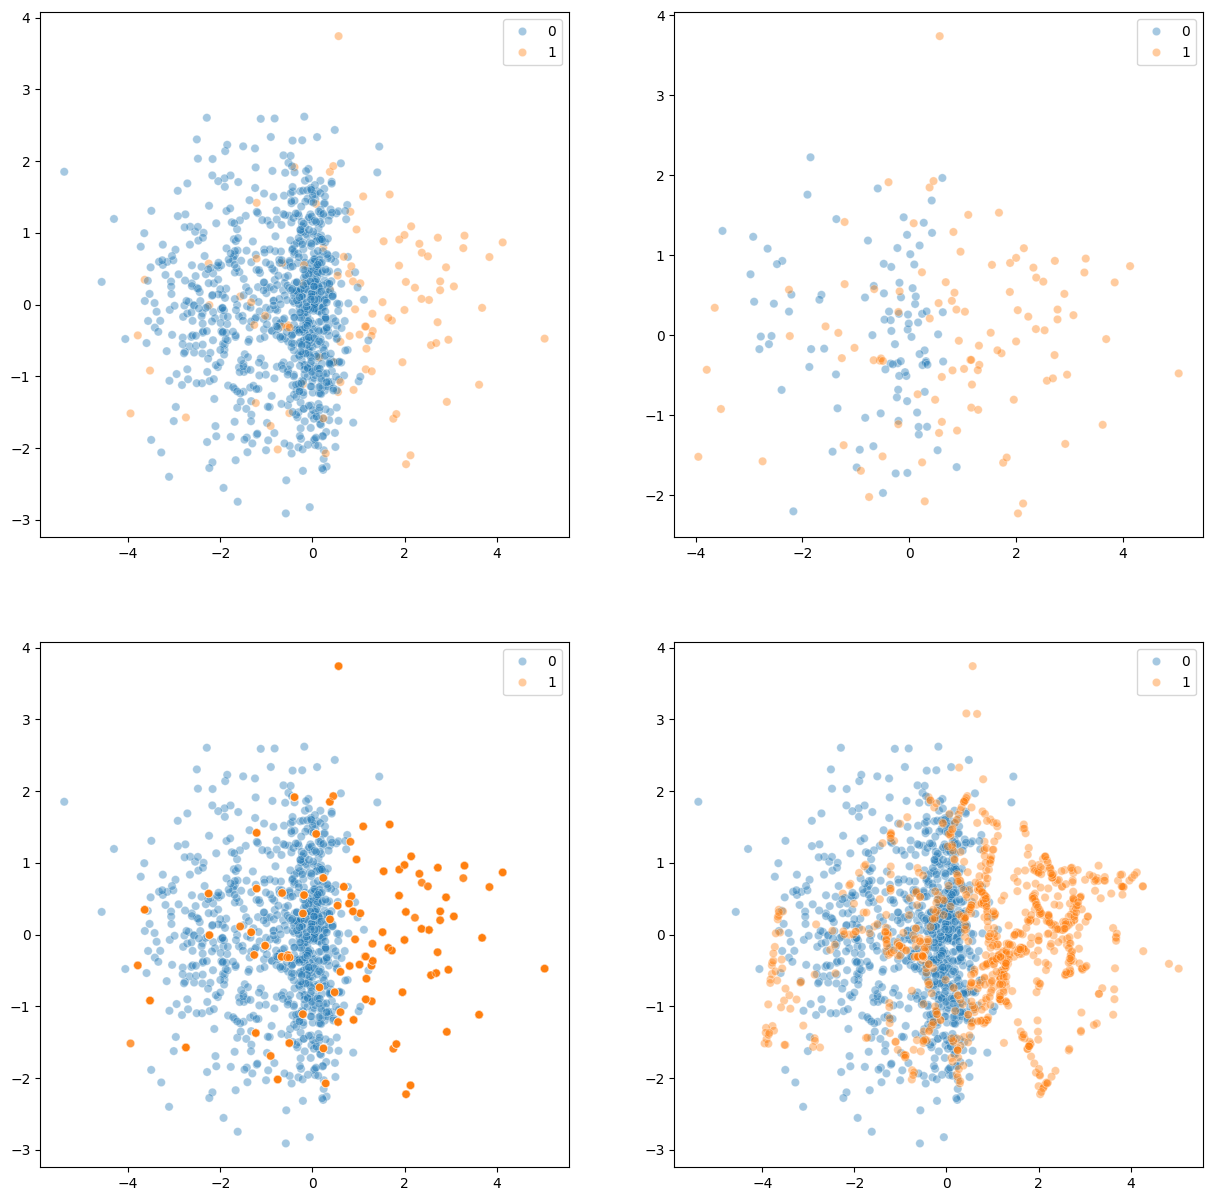

In [37]:
# 도화지의 영역을 행 2개, 열 2개로 나눈다.
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize= (15, 15))

# 산점도 그래프 생성
sns.scatterplot( x= x[:, 2], y= x[:, 3], ax= axes[0][0], hue= y, alpha= 0.4 )
sns.scatterplot( x= x_under[:, 2], y= x_under[:, 3], ax= axes[0][1], hue= y_under, alpha= 0.4 )
sns.scatterplot( x= x_over[:, 2], y= x_over[:, 3], ax= axes[1][0], hue= y_over, alpha= 0.4 )
sns.scatterplot( x= x_sm[:, 2], y= x_sm[:, 3], ax= axes[1][1], hue= y_sm, alpha= 0.4 )
plt.show()